### Code

In [1]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.ops import rnn, rnn_cell
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import numpy as np # Included
import pandas as pd
import csv
import sys
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer as DV
from keras.losses import binary_crossentropy

#np.set_printoptions(threshold=sys.maxsize)

dir1="/home/ubuntu/dataset/"
#dir1="/Users/ejl334/Downloads/IoT Dataset by UC/Concatenated/Archive/"

from numpy import genfromtxt
benign_traffic = genfromtxt(dir1+'benign_traffic.csv', delimiter=',')
malicious_traffic_dataset = genfromtxt(dir1+'mirai_udp.csv', delimiter=',')

/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
# DELETE COLUMNS WITH NAN
print("========================================================================")
print("***BENIGN TRAFFIC***")
print("========================================================================")
print("***DIMENSIONS***")
numrows = len(benign_traffic)
numcols = len(benign_traffic[0])
print("Dimensions Rows: %s Columns: %s" %(numrows,numcols))

print("***NAN ROWS***")
nan_rows=np.argwhere(np.isnan(benign_traffic).any(axis=1))
print(nan_rows)

print("***** NAN Removal *****")
benign_traffic = benign_traffic[~np.isnan(benign_traffic).any(axis=1)]

print("***DIMENSIONS***")
numrows_good = len(benign_traffic)
numcols = len(benign_traffic[0])
print("Dimensions Rows: %s Columns: %s" %(numrows_good,numcols))

print("***NAN ROWS***")
nan_rows=np.argwhere(np.isnan(benign_traffic).any(axis=1))
print(nan_rows)

print("========================================================================")
print("***MALICIOUS TRAFFIC***")
print("========================================================================")
print("***DIMENSIONS ML***")
malicious_dataset = malicious_traffic_dataset

numrows_ml = len(malicious_dataset)
numcols_ml = len(malicious_dataset[0])
print("Dimensions ML Rows: %s Columns: %s" %(numrows_ml,numcols_ml))

print("***NAN ROWS ML***")
nan_rows_ml=np.argwhere(np.isnan(malicious_dataset).any(axis=1))
print(nan_rows_ml)

print("***** NAN Removal ML *****")
malicious_dataset = malicious_dataset[~np.isnan(malicious_dataset).any(axis=1)]

print("***DIMENSIONS ML***")
numrows_bad = len(malicious_dataset)
numcols_bad = len(malicious_dataset[0])
print("Dimensions ML Rows: %s Columns: %s" %(numrows_bad,numcols_bad))
print("***NAN ROWS ML***")
nan_rows_ml=np.argwhere(np.isnan(malicious_dataset).any(axis=1))
print(nan_rows_ml)

***BENIGN TRAFFIC***
***DIMENSIONS***
Dimensions Rows: 555941 Columns: 115
***NAN ROWS***
[[     0]
 [ 49549]
 [ 62663]
 [101764]
 [277005]
 [339160]
 [437675]
 [489826]
 [536412]]
***** NAN Removal *****
***DIMENSIONS***
Dimensions Rows: 555932 Columns: 115
***NAN ROWS***
[]
***MALICIOUS TRAFFIC***
***DIMENSIONS ML***
Dimensions ML Rows: 1230006 Columns: 115
***NAN ROWS ML***
[[      0]
 [ 237666]
 [ 389148]
 [ 606183]
 [ 762432]
 [ 921041]
 [1072921]]
***** NAN Removal ML *****
***DIMENSIONS ML***
Dimensions ML Rows: 1229999 Columns: 115
***NAN ROWS ML***
[]


In [3]:
benign_traffic[0]

array([1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 1.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 1.00000000e+00, 6.00000000e+01, 0.00000000e+00,
       1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 1.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 1.00000000e+00, 6.00000000e+01, 0.00000000e+00,
       1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 1.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 6.00000000e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 6.00000000e+01, 0.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 6.00000000e+01, 0.00000000e+00,
      

In [4]:
# DELETE UNWANTED COLUMNS
benign_traffic = np.delete(benign_traffic, [2,5,8,11,14,17,20,23,26,29,\
                                            34,35,41,42,48,49,55,56,62,63,\
                                            66,67,69,70,72,73,75,76,78,79,\
                                            84,85,91,92,98,99,105,106,112,113,], axis=1)
malicious_dataset = np.delete(malicious_dataset, [2,5,8,11,14,17,20,23,26,29,\
                                            34,35,41,42,48,49,55,56,62,63,\
                                            66,67,69,70,72,73,75,76,78,79,\
                                            84,85,91,92,98,99,105,106,112,113,], axis=1)


In [5]:
print("***DIMENSIONS BENIGN***")
numrows_good = len(benign_traffic)
numcols_good = len(benign_traffic[0])
print("Dimensions Rows: %s Columns: %s" %(numrows_good,numcols_good))
print("***DIMENSIONS MALICIOUS***")
numrows_bad = len(malicious_dataset)
numcols_bad = len(malicious_dataset[0])
print("Dimensions Rows: %s Columns: %s" %(numrows_bad,numcols_bad))

***DIMENSIONS BENIGN***
Dimensions Rows: 555932 Columns: 75
***DIMENSIONS MALICIOUS***
Dimensions Rows: 1229999 Columns: 75


In [6]:
# Define Labels
y_benings = np.zeros(len(benign_traffic),dtype=int)
y_malicious = np.ones(len(malicious_dataset),dtype=int)

complete_dataset = np.concatenate((benign_traffic, malicious_dataset), 0)
print("*** COMPLETE DATASET ***")
numrows = len(complete_dataset)
numcols = len(complete_dataset[0])
print("Dimensions Rows: %s Columns: %s" %(numrows,numcols))
complete_dataset_labels = np.concatenate((y_benings,y_malicious),0)
print("*** COMPLETE DATASET Labels ***")
numrows = len(complete_dataset_labels)
numcols = len(complete_dataset_labels)
print("Dimensions Rows: %s" %(numrows))

*** COMPLETE DATASET ***
Dimensions Rows: 1785931 Columns: 75
*** COMPLETE DATASET Labels ***
Dimensions Rows: 1785931


In [7]:
# NORMALIZE DATASET
scaler = MinMaxScaler(feature_range=(0, 1))
dataX_ = scaler.fit_transform(complete_dataset)

In [8]:
from sklearn import model_selection
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(dataX_, complete_dataset_labels, test_size=validation_size, random_state=seed)

##### NEW #####
#validation_size = 0.50
#seed = 7
#X_validation, X_test, Y_validation, Y_test = model_selection.train_test_split(X_validation, Y_validation, test_size=validation_size, random_state=seed)
###############

del dataX_

In [9]:
print(np.shape(X_train), np.shape(X_validation))#, np.shape(X_test))
print(len(Y_train), len(Y_validation))#, len(Y_test))

(1428744, 75) (357187, 75)
1428744 357187


In [10]:
# Vectorize data
print(len(Y_validation))
vector_train_x = X_train.reshape((len(X_train), 1, 75))
print(vector_train_x.shape)
vector_validation_x = X_validation.reshape((len(X_validation), 1, 75))
print(vector_validation_x.shape)
#vector_test_x = X_test.reshape((len(X_test), 1, 75))
#print(vector_test_x.shape)

357187
(1428744, 1, 75)
(357187, 1, 75)


In [11]:
# Vectorize Data

# vector_train_x = X_.reshape((len(X_), 1, 75))
# print(vector_train_x.shape)

# LSTM MODEL

In [12]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt

seed=7
np.random.seed(seed)
cvscores = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
#print(vector_train_x.shape)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i=0

for index, (train, validation) in enumerate(kfold.split(vector_train_x, Y_train)):
    
    
    print("===================================================")
    print("Length of Train: %s   Length of Validation %s" %(len(train),len(validation)))
    print("\n\nTraining on fold " + str(index+1) + "/10...\n\n")
    
    batch_size = 100000
    model = Sequential()
    model.add(LSTM(28, input_shape=(1,75), return_sequences=True, name="LSTM_0"))
    model.add(Dropout(0.5, name="Dropout_0"))
    model.add(LSTM(28, name="LSTM_1"))
    model.add(Dropout(0.5, name="Dropout_1"))
    model.add(Dense(28, name="Dense_0"))
    model.add(Dense(1, activation="tanh", name="Dense_1")) #activation="tanh"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.003, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
#    model.summary()
#    model.fit(vector_train_x[train], complete_dataset_labels[train], epochs=20, batch_size=batch_size, verbose=2, shuffle=True,callbacks=[early_stopping],validation_data=(vector_validation_x, Y_validation)) #
    history = model.fit(vector_train_x[train], Y_train[train], epochs=30, batch_size=batch_size, verbose=2, shuffle=True,validation_data=(vector_train_x[validation], Y_train[validation]),callbacks=[early_stopping]) #
    scores = model.evaluate(vector_train_x[validation], Y_train[validation], verbose=0)
    predictions = model.predict(vector_train_x[validation])
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    #print("Scores")
    #print(print(scores))
    
    fpr, tpr, thresholds = roc_curve(Y_train[validation], predictions)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i += 1
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Length of Train: 1285868   Length of Validation 142876


Training on fold 1/10...






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1285868 samples, validate on 142876 samples
Epoch 1/30
 - 4s - loss: 3.5395 - acc: 0.3109 - val_loss: 1.4473 - val_acc: 0.3109
Epoch 2/30
 - 3s - loss: 1.2973 - acc: 0.3109 - val_loss: 1.1160 - val_acc: 0.3109
Epoch 3/30
 - 3s - loss: 1.0414 - acc: 0.3125 - val_loss: 0.9038 - val_acc: 0.3109
Epoch 4/30
 - 3s - loss: 0.8461 - acc: 0.3637 - val_loss: 0.7131 - val_acc: 0.3174
Epoch 5/30
 - 3s - loss: 0.6678 - acc: 0.5487 - val_loss: 0.5391 - val_acc: 0.7619
Epoch 6/30
 - 3s - loss: 0.5146 - acc: 0.7571 - val_loss: 0.4018 - val_acc: 0.9213
Epoch 7/30
 - 3s - loss: 0.4023 - acc: 0.8775 - val_loss: 0.3145 - val_acc: 0.9652
Epoch 8/30
 - 3s - loss: 0.3332 - acc: 0.9213 - val_loss: 0.2661 - 

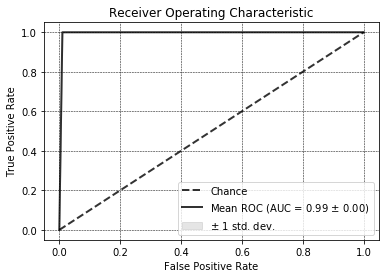

In [13]:
    
from keras.models import load_model
model.save(dir1+'mirai_udp_model.h5')


%matplotlib inline
#########################################################################
# Plot ROC
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='k',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('ROC_mirai_udp.png')
plt.show()

In [14]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_0 (LSTM)                (None, 1, 28)             11648     
_________________________________________________________________
Dropout_0 (Dropout)          (None, 1, 28)             0         
_________________________________________________________________
LSTM_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
Dropout_1 (Dropout)          (None, 28)                0         
_________________________________________________________________
Dense_0 (Dense)              (None, 28)                812       
_________________________________________________________________
Dense_1 (Dense)              (None, 1)                 29        
Total params: 18,873
Trainable params: 18,873
Non-trainable params: 0
_________________________________________________

In [15]:
print(cvscores)

[97.96466866373639, 99.87191690696828, 98.02343323487828, 96.88116802225683, 97.45580021557456, 99.98880132144407, 95.82289289863796, 97.61748113722581, 96.71668743088316, 98.10532357181853]


# Prediction

In [16]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(vector_validation_x).ravel()
print(y_pred_keras)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_validation, y_pred_keras)
print("FPR: %s\n TPR: %s\n Treasholds: %s" %(fpr_keras, tpr_keras, thresholds_keras))

[ 0.9947834   0.9976186   0.9999127  ... -0.03801998  0.99997747
  0.9349803 ]
FPR: [0.         0.         0.         ... 0.99986578 0.99988368 1.        ]
 TPR: [0.00000000e+00 4.07453133e-06 1.22235940e-05 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
 Treasholds: [ 1.9999971   0.99999714  0.9999971  ... -0.54680663 -0.5468725
 -0.54829097]


In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
y_pred_keras_logits = np.where(y_pred_keras > 0, 1, 0)
print(f1_score(Y_validation, y_pred_keras_logits, average="macro"))
print(precision_score(Y_validation, y_pred_keras_logits, average="macro"))
print(recall_score(Y_validation, y_pred_keras_logits, average="macro")) 

0.9625733072372653
0.9781910136637665
0.9500540452528883


In [18]:
tn, fp, fn, tp = confusion_matrix(Y_validation, y_pred_keras_logits).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  100602
False Positives:  11158
False Negatives:  13
True Positives:  245414


# AUC

In [19]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)
print(fpr_keras[0:5])
print(tpr_keras[0:5])

0.9999892971366087
[0. 0. 0. 0. 0.]
[0.00000000e+00 4.07453133e-06 1.22235940e-05 4.07453133e-05
 1.14086877e-04]


# Plot

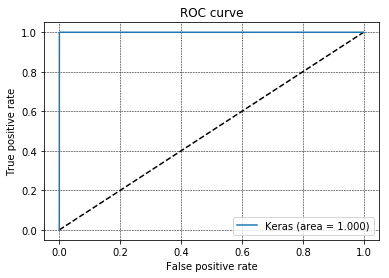

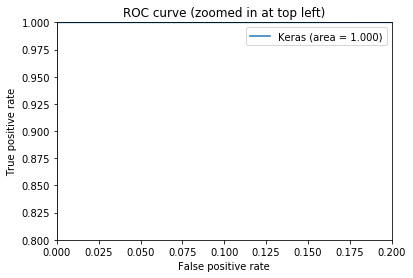

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

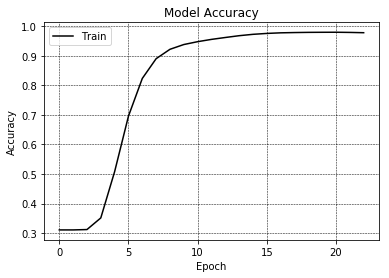

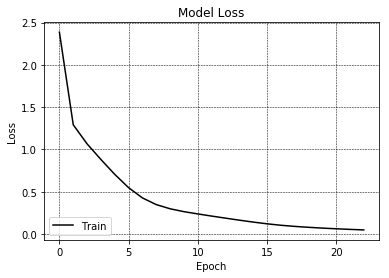

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'],color="black")
#plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left') #'Test'
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
plt.savefig('Accuracy.png')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'],color="black")
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
plt.savefig('Loss.png')
plt.show()


In [22]:
# from sklearn.metrics import roc_curve, auc
# from scipy import interp

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# # Compute ROC curve and area the curve
# i=0
# fpr, tpr, thresholds = roc_curve(Y_validation, y_pred_keras)
# tprs.append(interp(mean_fpr, fpr, tpr))
# tprs[-1][0] = 0.0
# roc_auc = auc(fpr, tpr)
# aucs.append(roc_auc)
# plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC (AUC = %0.2f)' % (roc_auc))



# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#          label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# plt.plot(mean_fpr, mean_tpr, color='b',
#          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#          lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                  label=r'$\pm$ 1 std. dev.')

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
# #plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.savefig('ROC.png')
# plt.show()

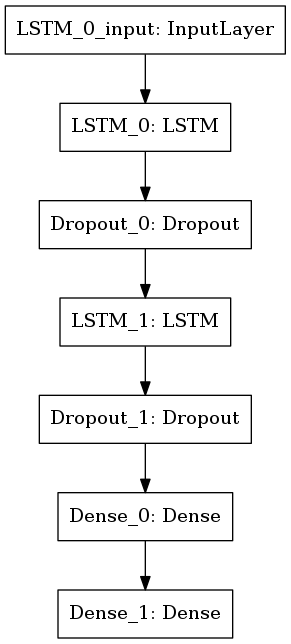

In [23]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(y_pred_keras[0:4])

# For TANH
y_pred_keras_logits = np.where(y_pred_keras > 0, 1, 0)

# For Sigmoid or Softmax
#y_pred_keras_logits = [np.round(i) for i in y_pred_keras]

print(y_pred_keras_logits[0:4])


#tn, fp, fn, tp = confusion_matrix(Y_validation, y_pred_keras_logits)
# print('True Positive %s' %tp)
# print('True Negative %s' %tn)
# print('False Positive %s' %fp)
# print('False Positive %s' %fn)


#print(y_pred_keras_logits[0:4])
print('Confusion Matrix')
print(confusion_matrix(Y_validation, y_pred_keras_logits))
print('Classification Report')
target_names = ['Good', 'Bad']
print(classification_report(Y_validation, y_pred_keras_logits, target_names=target_names))

[0.9947834  0.9976186  0.9999127  0.94584656]
[1 1 1 1]
Confusion Matrix
[[100602  11158]
 [    13 245414]]
Classification Report
              precision    recall  f1-score   support

        Good       1.00      0.90      0.95    111760
         Bad       0.96      1.00      0.98    245427

    accuracy                           0.97    357187
   macro avg       0.98      0.95      0.96    357187
weighted avg       0.97      0.97      0.97    357187



In [25]:
print(np.count_nonzero(Y_validation==0))
print(np.count_nonzero(y_pred_keras_logits==0))

print(np.count_nonzero(Y_validation==1))
print(np.count_nonzero(y_pred_keras_logits==1))

111760
100615
245427
256572
